In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_csv('./EEG_data.csv')
data = pd.read_csv('./demographic_info.csv')

In [44]:
data = data.rename(columns={'subject ID': 'SubjectID',
                   ' gender': 'gender', ' age': 'age', ' ethnicity': 'ethnicity'})
df = df.merge(data, how='inner', on='SubjectID')
# df.head()

In [45]:
df['gender'] = df['gender'].replace({'M': 1, 'F': 0})
df['ethnicity'] = df['ethnicity'].replace(
    {'Han Chinese': 0, 'Bengali': 1, 'English': 2})
df.drop(columns=['SubjectID', 'predefinedlabel'], inplace=True)

/tmp/ipykernel_33819/3218076132.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'M': 1, 'F': 0})
/tmp/ipykernel_33819/3218076132.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ethnicity'] = df['ethnicity'].replace(


In [46]:
df.columns

Index(['VideoID', 'Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1',
       'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'user-definedlabeln',
       'age', 'ethnicity', 'gender'],
      dtype='object')

In [47]:
top_fea = df.drop(['user-definedlabeln'], axis=1)

In [48]:
top_fea.columns

Index(['VideoID', 'Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1',
       'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'age', 'ethnicity',
       'gender'],
      dtype='object')

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [50]:
from sklearn.model_selection import train_test_split
y = df['user-definedlabeln']
X = df.drop(columns=['user-definedlabeln'])
X_train, x_test, Y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.27)

In [51]:
scaler = StandardScaler()
svm_classifier = SVC()

pipeline = make_pipeline(scaler, svm_classifier)

pipeline.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [52]:
x_test.head(1000)

,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,age,ethnicity,gender
772,5.0,41.0,78.0,195.0,2508980.0,474498.0,344011.0,154192.0,52440.0,98050.0,241122.0,31639.0,25,0,1
10196,9.0,54.0,47.0,101.0,52708.0,23416.0,6995.0,8509.0,15975.0,35520.0,16925.0,12796.0,25,0,1
385,2.0,37.0,48.0,71.0,39565.0,23315.0,4450.0,3213.0,3810.0,4556.0,2861.0,1351.0,25,0,1
4269,3.0,0.0,0.0,-10.0,2110853.0,1151980.0,120538.0,236133.0,125886.0,116159.0,109341.0,11701.0,28,0,0
8,0.0,43.0,69.0,17.0,492796.0,120998.0,63697.0,68242.0,10769.0,88403.0,73756.0,22676.0,25,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,4.0,35.0,34.0,60.0,8265.0,8061.0,2152.0,4626.0,9848.0,23874.0,17064.0,8425.0,31,2,1
3547,7.0,47.0,48.0,68.0,13754.0,15711.0,3015.0,8335.0,10045.0,8921.0,6251.0,3618.0,31,2,1
6843,2.0,56.0,77.0,68.0,1781767.0,107387.0,115799.0,12610.0,48187.0,20223.0,8478.0,6904.0,24,0,1
4342,3.0,0.0,0.0,-140.0,23928.0,5044.0,827.0,1685.0,508.0,24000.0,255.0,422.0,28,0,0


In [53]:
# x_test.head(100).to_csv('test.csv', index=False)

In [54]:
# received_data = pd.read_csv('test.csv')

In [55]:
y_test.head()

772      1.0
10196    0.0
385      1.0
4269     0.0
8        0.0
Name: user-definedlabeln, dtype: float64

In [56]:

# received_array = np.array([5.0,41.0,78.0,195.0,2508980.0,474498.0,344011.0,154192.0,52440.0,98050.0,241122.0,31639.0,25,0,1])
# # Convert the array into a DataFrame with the same structure
# columns_to_select = ['VideoID','Attention', 'Mediation', 'Raw', 'Delta', 'Theta', 'Alpha1', 'Alpha2',
#        'Beta1', 'Beta2', 'Gamma1', 'Gamma2', 'age', 'ethnicity', 'gender']
# # Create a new DataFrame with the selected columns
# received_dataframe = pd.DataFrame(data=[received_array], columns=columns_to_select)
# # received_dataframe
# X_new = received_dataframe
# X_new_standardized = scaler.transform(X_new)
# predictions = svm_classifier.predict(X_new_standardized)
# predictions


## Performance Scores

In [57]:
predictions = pipeline.predict(x_test).astype(int)
predictions.shape

(3459,)

In [58]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.744434807747904

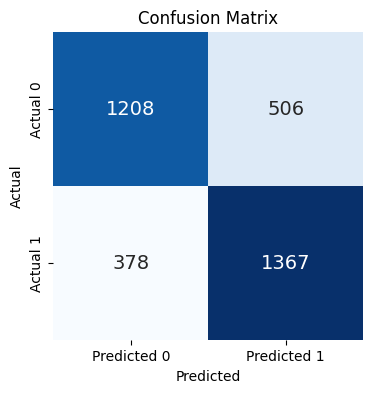

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

# Assuming cm is your confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a heatmap with labels and display exact numerical values
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [60]:
target_names = ['class 0', 'class 1']
print("Classification Report\n")
print(classification_report(y_test, predictions, target_names=target_names))

Classification Report

              precision    recall  f1-score   support

     class 0       0.76      0.70      0.73      1714
     class 1       0.73      0.78      0.76      1745

    accuracy                           0.74      3459
   macro avg       0.75      0.74      0.74      3459
weighted avg       0.75      0.74      0.74      3459



In [61]:
# saving pipeline as joblib file

import joblib

joblib.dump(pipeline, 'svm_model.joblib')

['svm_model.joblib']